In [9]:
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os
from netCDF4 import Dataset as NetCDFFile 
import h5netcdf
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rioxarray as rio
import geopandas as gpd
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [10]:
#load in temp data
# temp_1999 = xr.open_dataset("../Temperature/Output Deliverable/export_1999.nc")
# temp_2008 = xr.open_dataset("../Temperature/Output Deliverable/export_2008.nc")
# temp_change = xr.open_dataset("../Temperature/Output Deliverable/export_change.nc")
#load in netcdf file
change = NetCDFFile('../Temperature/Output Deliverable/export_change.nc')
temp_2008 = NetCDFFile('../Temperature/Output Deliverable/export_2008.nc')
temp_1999 = NetCDFFile('../Temperature/Output Deliverable/export_1999.nc')

#load in whale data
loc_1999 = pd.read_csv('exports/loc_1999.csv').drop('geometry', axis=1)
loc_2008 = pd.read_csv('exports/loc_2008.csv').drop('geometry', axis=1)
#turn to gpd
loc_1999 = gpd.GeoDataFrame(loc_1999, geometry=gpd.points_from_xy(x=loc_1999['long'], y=loc_1999['lat']))
loc_2008 = gpd.GeoDataFrame(loc_2008, geometry=gpd.points_from_xy(x=loc_2008['long'], y=loc_2008['lat']))

In [20]:
#read the variables in the netcdf files:

#change map
lat = change.variables['lat'][:] 
long = change.variables['lon'][:]
sst = change.variables['change_percent'][:] 

#

lat_1999 = temp_1999.variables['lat'][:] 
long_1999 = temp_1999.variables['lon'][:]
sst_1999 = temp_1999.variables['sst'][:][0][0]

lat_2008= temp_2008.variables['lat'][:]
long_2008 = temp_2008.variables['lon'][:]
sst_2008 = temp_2008.variables['sst'][:][0][0]

# Define the corners of the map
llon = -165.662
llat = 4.606
ulon = -54.362
ulat = 53.148

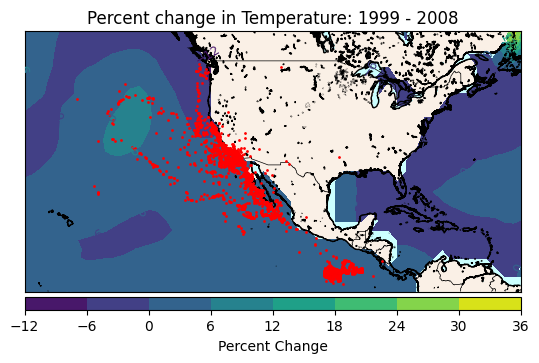

<Figure size 640x480 with 0 Axes>

In [12]:
#first we'll do change with 2008 points only:

# Create a Basemap object
map = Basemap(projection='merc', llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat, resolution='f')

# Draw map features
map.drawcoastlines()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')

# Generate some sample data (replace this with your actual data)
lons = long - 360
lats = lat
lons, lats = np.meshgrid(lons, lats)
sst = sst  # Sample sea surface temperature data

# Transform coordinates for plotting on the map
x, y = map(lons, lats)

# Plot the contour plot on the map
temp = map.contourf(x, y, sst)

# Generate some sample data points to overlay on the map
data_lons = loc_2008.long
data_lats = loc_2008.lat

# Transform coordinates for plotting data points on the map
data_x, data_y = map(data_lons, data_lats)

# Plot the data points on the map
map.plot(data_x, data_y, 'or', markersize=1)  # blue circles with size 5

# Add a colorbar
cb = map.colorbar(temp, location='bottom', size="5%", pad="2%")
cb.set_label('Percent Change')

plt.clabel(temp, fontsize=9, inline=1) # contour labels
plt.title('Percent change in Temperature: 1999 - 2008')
# Show the plot
plt.show()
plt.savefig('exports/change_2008_with_whales.png');

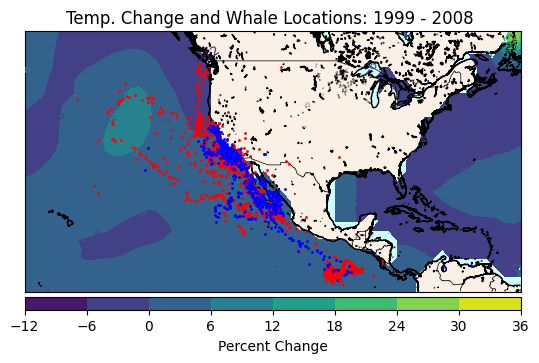

<Figure size 640x480 with 0 Axes>

In [13]:
#Next we do change with 2008 and 1999 points to see the difference
# Create a Basemap object
map = Basemap(projection='merc', llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat, resolution='f')

# Draw map features
map.drawcoastlines()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')

# Transform coordinates for plotting on the map
x, y = map(lons, lats)

# Plot the contour plot on the map
temp = map.contourf(x, y, sst)

# Add 1999 data 
data_lons = loc_2008.long
data_lats = loc_2008.lat
data_lons_1 = loc_1999.long
data_lats_1 = loc_1999.lat
# Transform coordinates for plotting data points on the map
data_x, data_y = map(data_lons, data_lats)
data_x_1, data_y_1 = map(data_lons_1, data_lats_1)
# Plot the data points on the map
map.plot(data_x, data_y, 'or', markersize=1)  # blue circles with size 5
map.plot(data_x_1, data_y_1, 'ob', markersize=1)

# Add a colorbar
cb = map.colorbar(temp, location='bottom', size="5%", pad="2%")
cb.set_label('Percent Change')

plt.clabel(temp, fontsize=9, inline=1) # contour labels
plt.title('Temp. Change and Whale Locations: 1999 - 2008 ')
# Show the plot
plt.show()
plt.savefig('exports/change_1999_2008_with_whales.png');

In [17]:
 change.variables['change_percent'][:].shape

(26, 57)

In [19]:
temp_1999.variables['sst'][:][0][0].shape

(26, 57)

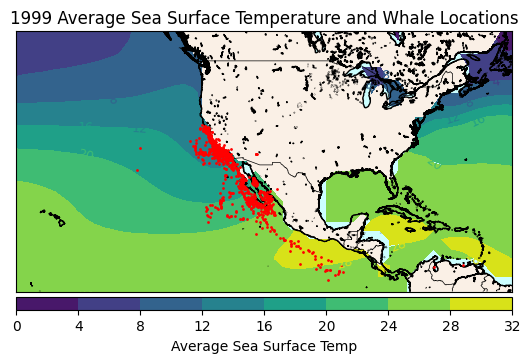

<Figure size 640x480 with 0 Axes>

In [22]:
#now we can do average temp in 1999 with 1999 points
# Create a Basemap object
map = Basemap(projection='merc', llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat, resolution='f')

# Draw map features
map.drawcoastlines()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')

# Generate some sample data (replace this with your actual data)
lons = long - 360
lats = lat
lons, lats = np.meshgrid(lons, lats)
sst = sst_1999  # Sample sea surface temperature data

# Transform coordinates for plotting on the map
x, y = map(lons, lats)

# Plot the contour plot on the map
temp = map.contourf(x, y, sst)

#get whale points
data_lons = loc_1999.long
data_lats = loc_1999.lat

# Transform coordinates for plotting data points on the map
data_x, data_y = map(data_lons, data_lats)

# Plot the data points on the map
map.plot(data_x, data_y, 'or', markersize=1)  # blue circles with size 5

# Add a colorbar
cb = map.colorbar(temp, location='bottom', size="5%", pad="2%")
cb.set_label('Average Sea Surface Temp')

plt.clabel(temp, fontsize=9, inline=1) # contour labels
plt.title('1999 Average Sea Surface Temperature and Whale Locations')
# Show the plot
plt.show()
plt.savefig('exports/temp_1999_with_whales.png');

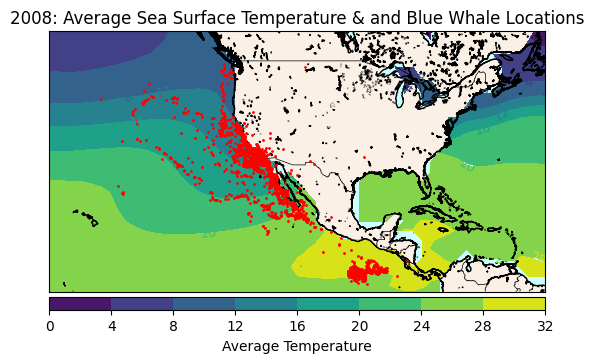

<Figure size 640x480 with 0 Axes>

In [23]:
# Create a Basemap object
map = Basemap(projection='merc', llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat, resolution='f')

# Draw map features
map.drawcoastlines()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')

# Generate some sample data (replace this with your actual data)
lons = long - 360
lats = lat
lons, lats = np.meshgrid(lons, lats)
sst = sst_2008  # Sample sea surface temperature data

# Transform coordinates for plotting on the map
x, y = map(lons, lats)

# Plot the contour plot on the map
temp = map.contourf(x, y, sst)

#get whale points
data_lons = loc_2008.long
data_lats = loc_2008.lat

# Transform coordinates for plotting data points on the map
data_x, data_y = map(data_lons, data_lats)

# Plot the data points on the map
map.plot(data_x, data_y, 'or', markersize=1)  # blue circles with size 5

# Add a colorbar
cb = map.colorbar(temp, location='bottom', size="5%", pad="2%")
cb.set_label('Average Temperature')

plt.clabel(temp, fontsize=9, inline=1) # contour labels
plt.title('2008: Average Sea Surface Temperature & and Blue Whale Locations')
# Show the plot
plt.show()
plt.savefig('exports/temp_2008_wwith_whales.png');